<a href="https://colab.research.google.com/github/Swathi201801150/Basic-Data-Types/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install tweepy

In [49]:
!pip install regex

In [50]:
import tweepy # to gather Twitter data
import pandas as pd

In [51]:
# Twitter API Credentials

APIkey = "TVWzEhvdPUeojyfyFbNQGPg0w"
APISecreatkey = "YWzcEqhixTjvrFx5Hk3ATPlgQOBSnqLDgNE3Eyeuu0HoL9WXiA"
accessToken = "1390128702634168320-lqrgru1xhZ3yUxqipN96WXR0hLomm5"
accessTokenSecreat = "Nj7fNK7kAbMdIUjIbr6RoTHH0XQasoAn38Pr26EDfLAMB"

In [52]:
# Create the authentication object

authenticate = tweepy.OAuthHandler(APIkey,APISecreatkey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api = tweepy.API(authenticate)

In [53]:
posts = api.user_timeline(screen_name = 'Trump',count = 100,lang = "en",tweet_mode = "extended")
i = 1
for tweet in posts[:10]: # Just want to see the top 10 from 100
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

1) Follow in the footsteps of golf legends on the two iconic links courses of @TrumpTurnberry, now open for play. 

Book your tee time: https://t.co/RgclVtRFOo. https://t.co/NHqdKeEs1E

2) Savor the sweetness of @TrumpStore chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! https://t.co/J85ytVtmoR

3) RT @TrumpHotels: Spotted: The ever innovative @TrumpChicago's Burst Your Bubble cocktail in @millenniummagazine's Netflix + Chill(ed): 12 C…

4) Is @TrumpGolfLA on your bucket list? Take a virtual tour of our oceanfront public course and discover the challenging game and unrivaled scenic beauty that awaits: https://t.co/JNRMzmVc04. https://t.co/hEUhJWbKBX

5) Central Park is truly one of the wonders of the world. At our corporate headquarters in Trump Tower, we are delighted to enjoy this spectacular view every day, but especially on #EarthDay. https://t.co/SPnSnjlWol

6) Our @TrumpHotels #NeverSettle mantra has transl

In [54]:
# Create a dataframe with a column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,Follow in the footsteps of golf legends on the...
1,Savor the sweetness of @TrumpStore chocolates ...
2,RT @TrumpHotels: Spotted: The ever innovative ...
3,Is @TrumpGolfLA on your bucket list? Take a vi...
4,Central Park is truly one of the wonders of th...
...,...
95,An enchanting spa treatment awaits you just be...
96,Revel in this majestic scene of the iconic @Tr...
97,Step away from the bustling city streets and i...
98,Our story began more than four decades ago wit...


In [55]:
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


177

In [56]:
# Make a function to clean the tweets
import re
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+','',text) # removing special charecters
  text = re.sub("#",'',text) # removing #
  text = re.sub('RT[\s]+','',text) # removing Retweets
  text = re.sub('https?:\/\/\S+','',text) # removing Links
  return text

In [57]:
!pip install contractions

In [58]:
# Expand Contractions

import contractions
def con(text):
  expand = contractions.fix(text)
  return expand

In [59]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [60]:
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

In [61]:
df.Tweets = df.Tweets.apply(lambda x:x.lower())
df.Tweets = df.Tweets.apply(con)
df.Tweets = df.Tweets.apply(cleanTxt)
df.Tweets = df.Tweets.apply(remove_stopwords)
df.head()

,Tweets
0,follow footsteps golf legends two iconic links...
1,savor sweetness chocolates summer long. shippi...
2,rt : spotted : ever innovative ' burst bubble ...
3,bucket list ? take virtual tour oceanfront pub...
4,central park truly one wonders world. corporat...


In [62]:
!pip install vaderSentiment

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()

In [64]:
df['compound'] = df['Tweets'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head()

,Tweets,compound
0,follow footsteps golf legends two iconic links...,0.3400
1,savor sweetness chocolates summer long. shippi...,0.5411
2,rt : spotted : ever innovative ' burst bubble ...,0.4404
3,bucket list ? take virtual tour oceanfront pub...,0.6908
4,central park truly one wonders world. corporat...,0.8555


In [65]:
# Create a function to compute negative and positive

def getAnalysis(score):
  if score<0:
    return 'Negative'
  else:
    return 'Positive'

df['Analysis'] = df['compound'].apply(getAnalysis)
df

,Tweets,compound,Analysis
0,follow footsteps golf legends two iconic links...,0.3400,Positive
1,savor sweetness chocolates summer long. shippi...,0.5411,Positive
2,rt : spotted : ever innovative ' burst bubble ...,0.4404,Positive
3,bucket list ? take virtual tour oceanfront pub...,0.6908,Positive
4,central park truly one wonders world. corporat...,0.8555,Positive
...,...,...,...
95,enchanting spa treatment awaits beyond lush ga...,0.0772,Positive
96,"revel majestic scene iconic lighthouse , true ...",0.7845,Positive
97,step away bustling city streets escape trump p...,0.1779,Positive
98,story began four decades ago one fearless lead...,0.7840,Positive


In [66]:
df.drop('compound', axis=1, inplace=True)
df

,Tweets,Analysis
0,follow footsteps golf legends two iconic links...,Positive
1,savor sweetness chocolates summer long. shippi...,Positive
2,rt : spotted : ever innovative ' burst bubble ...,Positive
3,bucket list ? take virtual tour oceanfront pub...,Positive
4,central park truly one wonders world. corporat...,Positive
...,...,...
95,enchanting spa treatment awaits beyond lush ga...,Positive
96,"revel majestic scene iconic lighthouse , true ...",Positive
97,step away bustling city streets escape trump p...,Positive
98,story began four decades ago one fearless lead...,Positive


In [67]:
df['Analysis'].value_counts()

Positive    98
Negative     2
Name: Analysis, dtype: int64

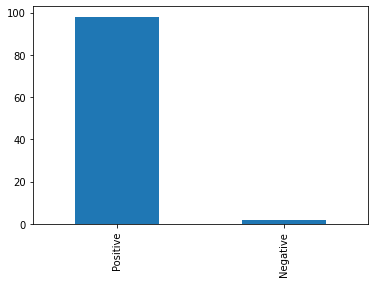

In [68]:
import matplotlib.pyplot as plt
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [69]:
df.describe(exclude='int')

,Tweets,Analysis
count,100,100
unique,100,2
top,savor sweetness chocolates summer long. shippi...,Positive
freq,1,98


In [70]:
df[df['Analysis'] == 'Positive']

,Tweets,Analysis
0,follow footsteps golf legends two iconic links...,Positive
1,savor sweetness chocolates summer long. shippi...,Positive
2,rt : spotted : ever innovative ' burst bubble ...,Positive
3,bucket list ? take virtual tour oceanfront pub...,Positive
4,central park truly one wonders world. corporat...,Positive
...,...,...
95,enchanting spa treatment awaits beyond lush ga...,Positive
96,"revel majestic scene iconic lighthouse , true ...",Positive
97,step away bustling city streets escape trump p...,Positive
98,story began four decades ago one fearless lead...,Positive


In [71]:
df[df['Analysis'] == 'Negative']

,Tweets,Analysis
27,no better place stay play legendary . book spr...,Negative
58,rt : three days left ! ⏰ take advantage 15 % e...,Negative


In [72]:
df.to_csv('Tweets.csv',index=False)

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [74]:
df = pd.read_csv('Tweets.csv')
print("\nThe Dataset is:\n", df)


The Dataset is:
                                                Tweets  Analysis
0   follow footsteps golf legends two iconic links...  Positive
1   savor sweetness chocolates summer long. shippi...  Positive
2   rt : spotted : ever innovative ' burst bubble ...  Positive
3   bucket list ? take virtual tour oceanfront pub...  Positive
4   central park truly one wonders world. corporat...  Positive
..                                                ...       ...
95  enchanting spa treatment awaits beyond lush ga...  Positive
96  revel majestic scene iconic lighthouse , true ...  Positive
97  step away bustling city streets escape trump p...  Positive
98  story began four decades ago one fearless lead...  Positive
99  rt : happy nationalbossday leaders trump golf ...  Positive

[100 rows x 2 columns]


In [75]:
print('\nThe dimensions of the dataset', df.shape)


The dimensions of the dataset (100, 2)


In [76]:
x = df['Tweets'].values
y = df['Analysis'].values

In [77]:
# Splitting the dataset into train and test data

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=0)
print(xtrain.shape)
print(xtest.shape)

(75,)
(25,)


In [78]:
import numpy as np
print(np.unique(ytrain,return_counts=True))

(array(['Negative', 'Positive'], dtype=object), array([ 2, 73]))


In [79]:
print(np.unique(ytest,return_counts=True))

(array(['Positive'], dtype=object), array([25]))


In [80]:
vectorizer = TfidfVectorizer()
df1 = vectorizer.fit_transform(x)

In [81]:
df2 = pd.DataFrame(df1.toarray(), columns=vectorizer.get_feature_names())
df2.head()

,10,100,12,15,16,18,1873,1930,1983,1996,1st,2020,2021,24kt,24t,25,269,26th,2nd,30,300,30th,31st,33,40,50,5th,68,72,_usa,accept,accolades,accommodations,acres,across,actual,addition,adorned,advantage,adventure,...,views,virginia,virtual,visit,vote,wake,walking,wall,watch,waves,way,wealth,weddings,week,weekends,welcome,welcoming,well,whether,whiskey,whiskies,whisky,white,whose,win,wine,winter,wish,wishing,within,women,wonder,wonderful,wonders,world,would,woven,year,years,york
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.316032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.279266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286337,0.165365,0.0,0.0,0.0,0.0,0.0


In [82]:
# Using Pipeline

from sklearn.pipeline import Pipeline
text_model = Pipeline([('TFIDF',TfidfVectorizer()),('model',MultinomialNB())])

In [83]:
text_model.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('TFIDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [84]:
import joblib
joblib.dump(text_model,'Sentiment_model')

['Sentiment_model']

In [85]:
text = ["palm beach sunrise captivating last , especially viewed extraordinary beach club mar-a-lago"]
text_model.predict(text)

array(['Positive'], dtype='<U8')

In [86]:
vectorizer = TfidfVectorizer()
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

In [87]:
model = MultinomialNB()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

In [88]:
ytest

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype=object)

In [89]:
# Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,ytest)

1.0

In [90]:
confusion_matrix(y_pred,ytest)

array([[25]])

In [91]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

    Positive       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [92]:
df['Tweets'][10]

'palm beach sunrise captivating last , especially viewed extraordinary beach club mar-a-lago.'

In [93]:
df['Analysis'][10]

'Positive'

In [94]:
text = ["palm beach sunrise captivating last , especially viewed extraordinary beach club mar-a-lago"]
text = vectorizer.transform(text)
model.predict(text)

array(['Positive'], dtype='<U8')